In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import os

In [ ]:
from google.colab import drive

# Force remount Google Drive to obtain a new authentication code
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
import tensorflow as tf

# Path to your dataset directory in Google Drive
dataset_dir = '/content/drive/MyDrive/Plant-Disease-Detection/Plant_Disease_Detection/train'

# Create image dataset
training_set = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70640 files belonging to 38 classes.


In [ ]:
# Path to your validation dataset directory in Google Drive
validation_dir = '/content/drive/MyDrive/Plant-Disease-Detection/Plant_Disease_Detection/valid'

# Create validation image dataset
validation_set = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17577 files belonging to 38 classes.


In [ ]:
# Load the EfficientNetB0 model with pre-trained ImageNet weights, excluding the top fully connected layers
base_model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
# Freeze the base model layers
base_model.trainable = False


In [ ]:
# Build the model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(38, activation='softmax')  # Assuming 38 classes in the dataset
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = ut.fit(training_set, validation_data=validation_set, epochs=10)


Epoch 1/10
2208/2208 [==============================] - 3989s 2s/step - loss: 0.5918 - accuracy: 0.8187 - val_loss: 0.1963 - val_accuracy: 0.9357
Epoch 2/10
2208/2208 [==============================] - 310s 140ms/step - loss: 0.2978 - accuracy: 0.9021 - val_loss: 0.1561 - val_accuracy: 0.9480
Epoch 3/10
2208/2208 [==============================] - 312s 141ms/step - loss: 0.2472 - accuracy: 0.9170 - val_loss: 0.1253 - val_accuracy: 0.9579
Epoch 4/10
2208/2208 [==============================] - 320s 145ms/step - loss: 0.2203 - accuracy: 0.9261 - val_loss: 0.1166 - val_accuracy: 0.9608
Epoch 5/10
2208/2208 [==============================] - 319s 144ms/step - loss: 0.1999 - accuracy: 0.9328 - val_loss: 0.1102 - val_accuracy: 0.9623
Epoch 6/10
2208/2208 [==============================] - 331s 150ms/step - loss: 0.1912 - accuracy: 0.9358 - val_loss: 0.1025 - val_accuracy: 0.9646
Epoch 7/10
2208/2208 [==============================] - 338s 153ms/step - loss: 0.1780 - accuracy: 0.9396 - val_lo

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_set)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

550/550 [==============================] - 64s 115ms/step - loss: 0.0921 - accuracy: 0.9693
Validation Accuracy: 96.93%


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(training_set)
print(f"Training Accuracy: {accuracy * 100:.2f}%")

2208/2208 [==============================] - 266s 120ms/step - loss: 0.0437 - accuracy: 0.9857
Training Accuracy: 98.57%


In [ ]:
import tensorflow as tf
import os

# Specify the directory path where you want to save the model
save_directory = '/content/drive/MyDrive/Plant-Disease-Detection/Plant_Disease_Detection'

# Ensure the directory exists (create it if it doesn't)
os.makedirs(save_directory, exist_ok=True)

# Specify the full path including the filename for saving the model
model_filename = 'EfficientBO_trained_plant_disease_model.keras'
model_path = os.path.join(save_directory, model_filename)

# Save the model to the specified path
model.save(model_path)
print(f"Model saved successfully at: {model_path}")

Model saved successfully at: /content/drive/MyDrive/Plant-Disease-Detection/Plant_Disease_Detection/EfficientBO_trained_plant_disease_model.keras


In [ ]:
history.history #Return Dictionary of history

{'loss': [0.5917806625366211,
  0.29776856303215027,
  0.2472156584262848,
  0.22025872766971588,
  0.19990715384483337,
  0.19116583466529846,
  0.1780329942703247,
  0.16909664869308472,
  0.16463564336299896,
  0.16083158552646637],
 'accuracy': [0.818686306476593,
  0.9020951390266418,
  0.9170158505439758,
  0.9260900616645813,
  0.9328142404556274,
  0.9357587695121765,
  0.939595103263855,
  0.9425679445266724,
  0.9441676139831543,
  0.9457530975341797],
 'val_loss': [0.1962980180978775,
  0.15611395239830017,
  0.12530072033405304,
  0.11655819416046143,
  0.11019513756036758,
  0.10252481698989868,
  0.09828390926122665,
  0.10072258114814758,
  0.08602292835712433,
  0.09207624942064285],
 'val_accuracy': [0.9357114434242249,
  0.9480002522468567,
  0.9578995108604431,
  0.9608010649681091,
  0.9623371362686157,
  0.9646128416061401,
  0.9658644795417786,
  0.9662627577781677,
  0.9693349003791809,
  0.9693349003791809]}

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
import matplotlib.pyplot as plt


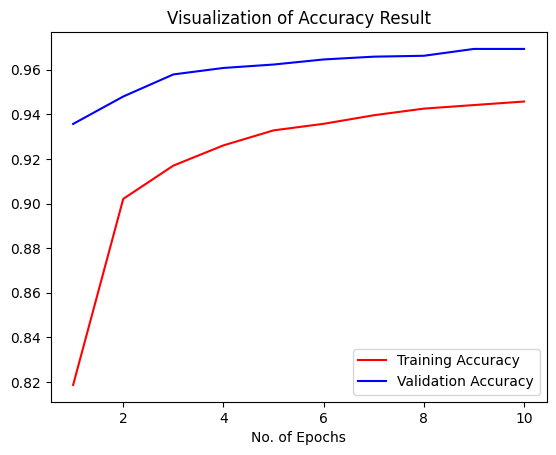

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [ ]:
test_dir = '/content/drive/MyDrive/Plant-Disease-Detection/Plant_Disease_Detection/valid'


test_set = tf.keras.utils.image_dataset_from_directory(
   test_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 17577 files belonging to 38 classes.


In [ ]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17577/17577 [==============================] - 389s 22ms/step


In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [ ]:
Y_true

<tf.Tensor: shape=(17577,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
predicted_categories

<tf.Tensor: shape=(17577,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [ ]:
class_name = validation_set.class_names

In [ ]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.96      0.96       504
                                 Apple___Black_rot       0.98      0.99      0.99       497
                          Apple___Cedar_apple_rust       1.00      0.98      0.99       440
                                   Apple___healthy       0.96      0.99      0.98       502
                               Blueberry___healthy       1.00      0.99      0.99       454
          Cherry_(including_sour)___Powdery_mildew       0.99      1.00      0.99       426
                 Cherry_(including_sour)___healthy       1.00      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.89      0.93       410
                       Corn_(maize)___Common_rust_       0.99      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.97      0.

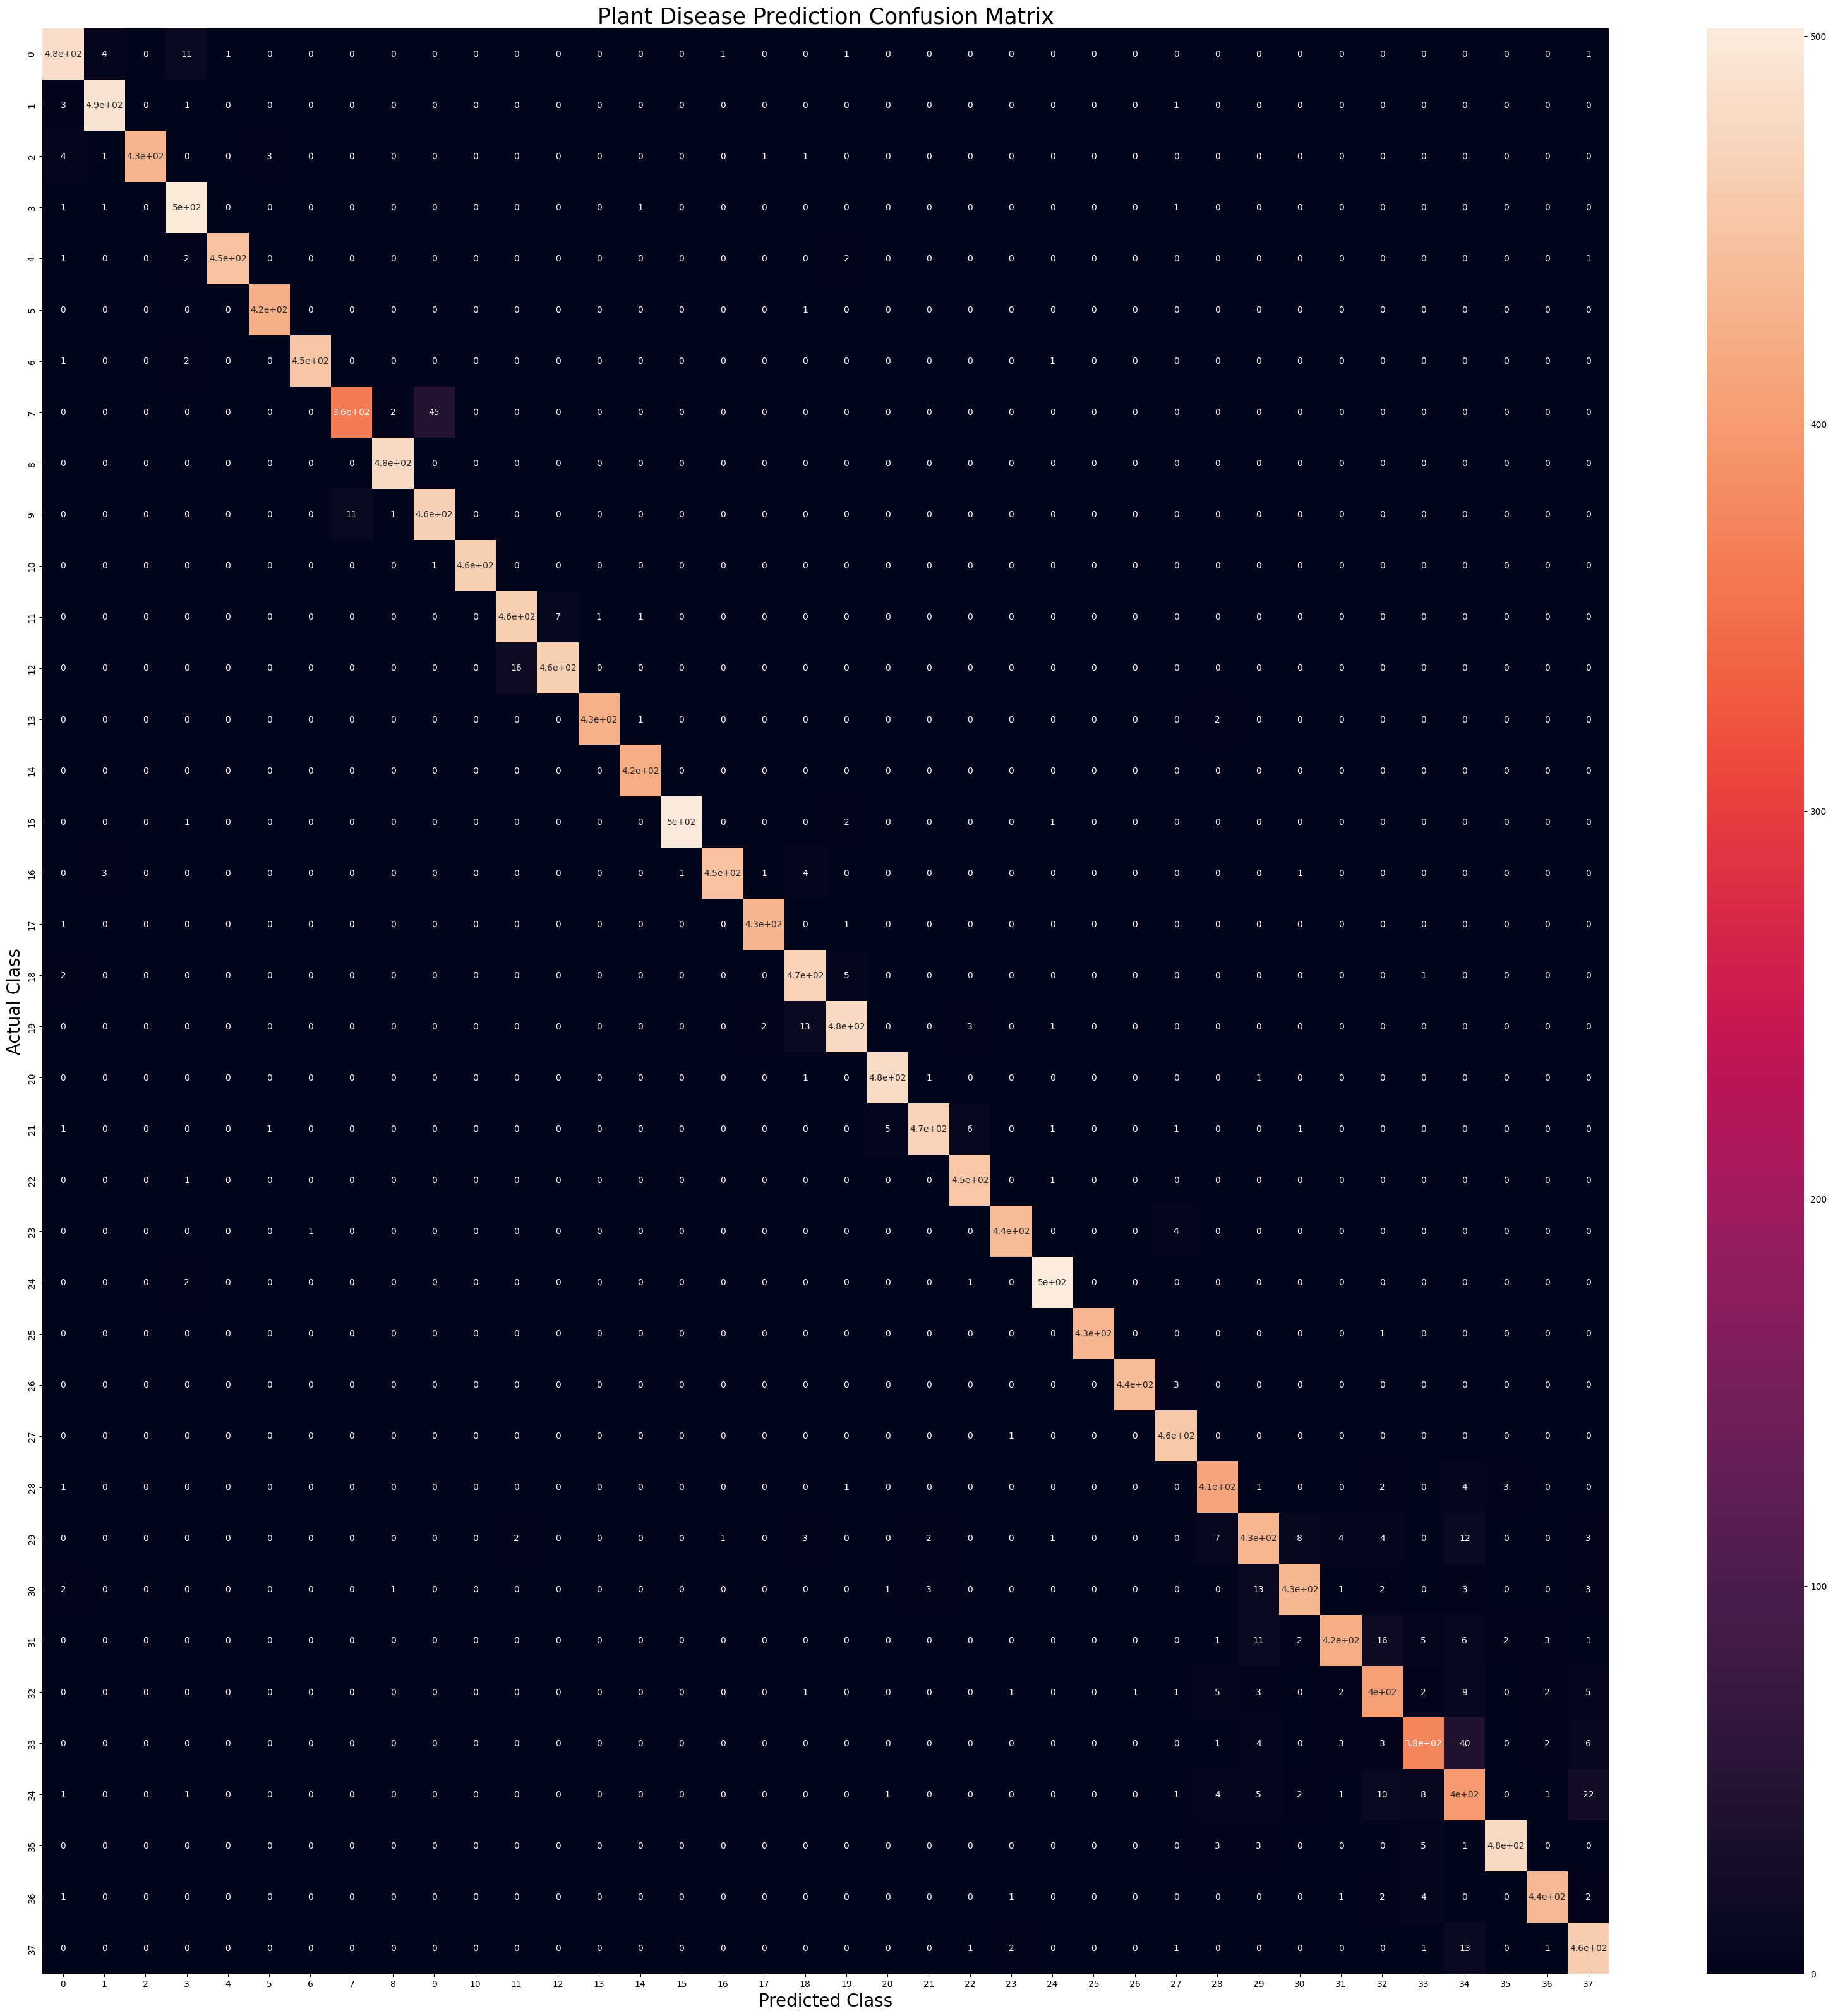

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()